In [30]:
%matplotlib inline
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import vak

import article

In [2]:
cd /home/art/Documents/repos/coding/birdsong/tweetynet/data/BFSongRepository/bl26lb16/vds

/home/art/Documents/repos/coding/birdsong/tweetynet/data/BFSongRepository/bl26lb16/vds


In [3]:
vds_041912 = vak.Dataset.load('041912.has_notmat.test.vds.json') 

In [4]:
df = article.util.make_df_trans_probs([vds_041912])

In [20]:
def get_trans_prob(df, date, label, label_plus_one):
    df_date = df[df['date'] == date]
    label_count = len(
        df_date[df_date['label'] == label].index
    )
    trans_count = len(
        df_date[(df_date['label'] == label) & (df_date['label_plus_one'] == label_plus_one)].index
    )
    p = trans_count / label_count
    return p

In [21]:
day = datetime(2012, 4, 19).date()
get_trans_prob(df, day, 'i', 'a')

0.5836148648648649

In [81]:
def make_trans_mat(df, min_p=0.01):
    labels = df['label'].unique()
    num_labels = labels.shape[0]
    trans_mat = np.zeros((num_labels, num_labels))
    for row, label in enumerate(labels):
        if label == 'E':
            continue
        else:
            for col, label_plus_one in enumerate(labels):
                p = get_trans_prob(df, day, label, label_plus_one)
                if p > min_p:
                    trans_mat[row, col] = p
                else:
                    trans_mat[row, col] = 0.
    # adjust so all rows sum to 1
    row_sums = trans_mat.sum(axis = 1)
    trans_mat = trans_mat[row_sums != 0.0, :]
    row_sums = trans_mat.sum(axis = 1)
    trans_mat = trans_mat / row_sums[:, np.newaxis]
    return trans_mat

In [82]:
trans_mat = make_trans_mat(df)

(-0.5, 8.5)

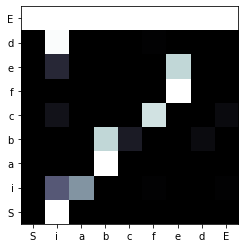

In [84]:
fig, ax = plt.subplots()
ax.imshow(trans_mat, cmap='bone')
ax.set_yticks(range(num_labels - 1))
ax.set_yticklabels(labels)
ax.set_ylim([-0.5, (num_labels -1) + 0.5])

ax.set_xticks(range(num_labels))
ax.set_xticklabels(labels);
ax.set_xlim([-0.5, (num_labels -1) + 0.5])